In [31]:
!pip install -U finance-datareader

In [32]:
!pip install plotly

In [33]:
!pip install prophet

In [34]:
!pip install streamlit

In [35]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns
from prophet import Prophet
import streamlit as st

In [36]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,76500,2,-200,-0.26,77400,77600,76200,11644425,892836057871,456688365075000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,176400,2,-1400,-0.79,179100,180400,175600,2243271,399127987700,128419617186000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,376000,1,4000,1.08,375000,377000,372000,108794,40743954000,87984000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,777000,1,7000,0.91,775000,778000,768000,78876,60834080000,55302198000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,64400,1,100,0.16,64700,64900,64300,427267,27545420100,52993903480000,822886700,STK


In [58]:
df_krx[df_krx['Name']=='삼성전자']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,76500,2,-200,-0.26,77400,77600,76200,11644425,892836057871,456688365075000,5969782550,STK


In [53]:
df_krx.to_csv('data.csv')

In [42]:
df_samsung = fdr.DataReader(symbol='005930') # 삼성전자 2000~2024년 4월까지의 데이터
df_samsung = df_samsung['Close']
df_samsung = pd.DataFrame(df_samsung)

In [43]:
df_samsung.reset_index(inplace=True)

In [44]:
df_samsung

,Date,Close
0,2000-01-10,5770
1,2000-01-11,5770
2,2000-01-12,5720
3,2000-01-13,5710
4,2000-01-14,5830
...,...,...
5995,2024-04-23,75500
5996,2024-04-24,78600
5997,2024-04-25,76300
5998,2024-04-26,76700


In [45]:
df_samsung.columns = ['ds','y']

In [46]:
df_samsung

,ds,y
0,2000-01-10,5770
1,2000-01-11,5770
2,2000-01-12,5720
3,2000-01-13,5710
4,2000-01-14,5830
...,...,...
5995,2024-04-23,75500
5996,2024-04-24,78600
5997,2024-04-25,76300
5998,2024-04-26,76700


In [47]:
# 1. 라이브러리를 변수로 만들고
prophet = Prophet()

 
# 2. 데이터로 학습시킨다
prophet.fit(df_samsung)


# 3. 예측하고자 하는 기간을 정해서, 비어있는 데이터프레임을 만든다
future = prophet.make_future_dataframe(periods=365, freq='D')  #365일

 
# 4. 예측을 한다
forecast = prophet.predict(future)

14:52:39 - cmdstanpy - INFO - Chain [1] start processing
14:52:41 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\406\anaconda3\envs\project310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\406\anaconda3\envs\project310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


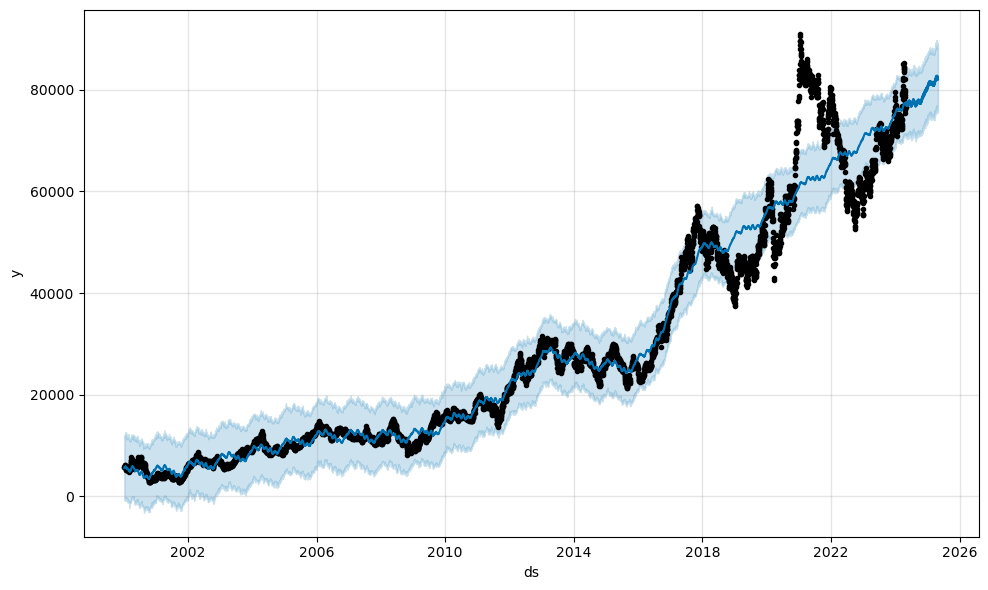

In [48]:
prophet.plot(forecast)
plt.show()

C:\Users\406\anaconda3\envs\project310\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\406\anaconda3\envs\project310\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\406\anaconda3\envs\project310\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

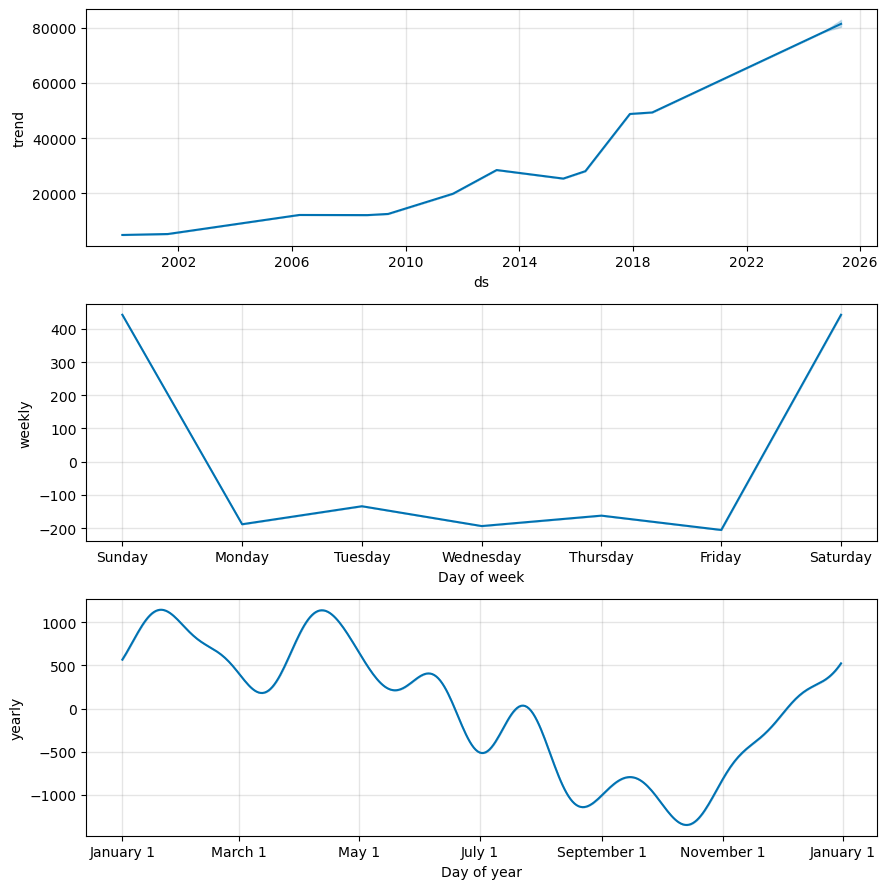

In [49]:
prophet.plot_components(forecast)
plt.show()

In [51]:
from prophet.serialize import model_to_json, model_from_json
 
with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(prophet))  # Save model

In [52]:
with open('serialized_model.json', 'r') as fin:
    prophet = model_from_json(fin.read())  # Load model

In [62]:
etf_list = fdr.StockListing("ETF/KR")

In [77]:
etf_list[etf_list['Category']==1]

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
2,069500,1,KODEX 200,36520,2,355,0.98,36595.0,8.7621,1862644,67909,60221
11,102110,1,TIGER 200,36600,2,385,1.06,36650.0,8.7775,1333794,48702,21814
12,278530,1,KODEX 200TR,12695,2,120,0.95,12723.0,8.7802,62814,795,21004
18,148020,1,KBSTAR 200,36745,2,345,0.95,36828.0,8.8945,262155,9624,12861
27,310970,1,TIGER MSCI Korea TR,15635,2,105,0.68,15675.0,9.5204,1304,20,11116
...,...,...,...,...,...,...,...,...,...,...,...,...
772,292750,1,ARIRANG KRX300,17430,2,155,0.90,17478.0,9.2662,27,0,52
785,391670,1,HK 베스트일레븐액티브,9480,3,0,0.00,9610.0,11.3329,0,0,47
787,433250,1,UNICORN R&D 액티브,11745,2,130,1.12,11792.0,4.6867,53,0,47
793,391680,1,HK 하이볼액티브,8215,3,0,0.00,8385.0,5.1856,0,0,45
